In [75]:
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd

EXP_NAME = "sinus_peak_noise"
EXP_MODEL = "mlp"
EXP_ATTR = "FA"

plt.style.use("ggplot")

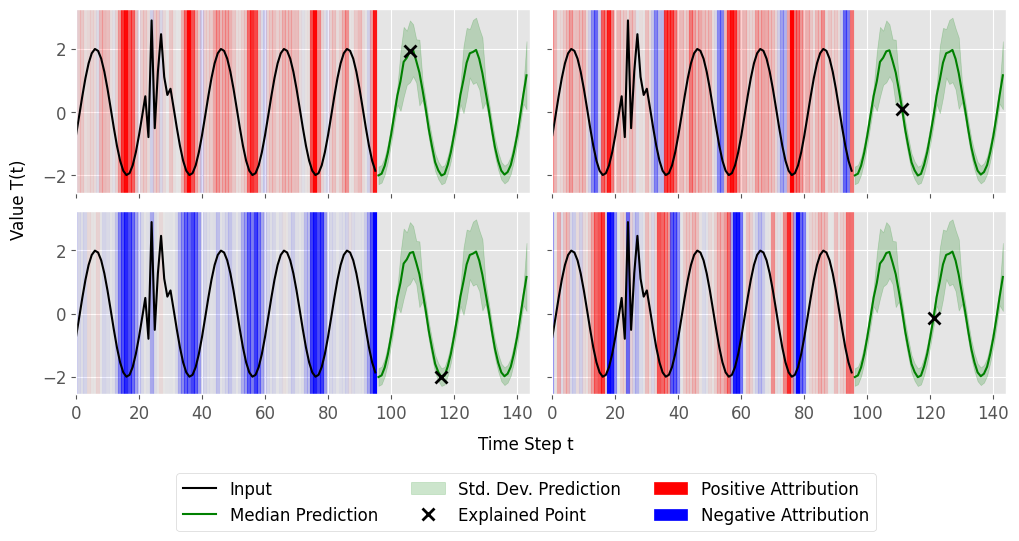

In [157]:
exp_root = Path("../experimental_runs")
exp_path = exp_root / EXP_NAME / EXP_MODEL / "results_csv"
predictions_path = exp_path / "predictions.csv"
fa_path = exp_path / EXP_ATTR

predictions_df = pd.read_csv(predictions_path)

fig, axes = plt.subplots(
    2, 2, sharex="all", sharey="all", figsize=(12, 5)
)  # Create a grid of 2x2 subplots
target_indices = [10, 15, 20, 25]

for ax, target_index in zip(axes.flatten(), target_indices):
    csv_path = fa_path / f"loc_attributions_{target_index}.csv"
    df = pd.read_csv(csv_path)
    df.loc[24, "y"] = 2.9

    pos_attr = df["pos_attr"]
    neg_attr = df["neg_attr"]
    input_x = np.arange(len(df["ds"]))
    prediction_x = np.arange(len(df["ds"]), len(df["ds"]) + len(predictions_df))

    # Plot the positive and negative attributions as vertical lines
    for i in range(len(pos_attr)):
        ax.axvline(x=input_x[i], color="red", alpha=pos_attr.iloc[i], lw=3)
        ax.axvline(x=input_x[i], color="blue", alpha=neg_attr.iloc[i], lw=3)

    # Plot the true values
    ax.plot(input_x, df["y"], label=f"Input", color="black")

    # Plot the predictions
    ax.plot(
        prediction_x,
        predictions_df[f"{EXP_MODEL.upper()}-loc"],
        label=f"Median Prediction",
        color="green",
    )

    # Fill between for the variance
    ax.fill_between(
        prediction_x,
        predictions_df[f"{EXP_MODEL.upper()}-loc"]
        - predictions_df[f"{EXP_MODEL.upper()}-scale"],
        predictions_df[f"{EXP_MODEL.upper()}-loc"]
        + predictions_df[f"{EXP_MODEL.upper()}-scale"],
        label=f"Std. Dev. Prediction",
        color="green",
        alpha=0.2,
    )

    ax.plot(
        prediction_x[target_index],
        predictions_df[f"{EXP_MODEL.upper()}-loc"].iloc[target_index],
        color="black",
        marker="x",
        markersize=8,
        markeredgewidth=2,
        label="Explained Point",
        linestyle="None",
    )
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12)

fig.subplots_adjust(wspace=0.05, hspace=0.1)


handles, labels = plt.gca().get_legend_handles_labels()

handles.append(mpatches.Patch(color="red", label="Positive Attribution"))
labels.append("Positive Attribution")
handles.append(mpatches.Patch(color="blue", label="Negative Attribution"))
labels.append("Negative Attribution")

fig.legend(
    handles,
    labels,
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, -0.18),
    facecolor="white",
    fontsize=12,
)


fig.text(0.5, 0.0, "Time Step t", ha="center", fontsize=12)
fig.text(0.07, 0.5, "Value T(t)", va="center", rotation="vertical", fontsize=12)
plt.xlim(0, 144)
plt.show()

In [130]:
fig.savefig("test.pdf", bbox_inches="tight")